Locally weighted regression (LOWESS) is a non-parametric regression method that fits a separate weighted least squares regression to every point in the dataset. The resulting fit is a smooth curve that follows the general trend of the data. The weights are determined by a kernel function, which assigns a weight to each point in the dataset based on its distance from the point at which the curve is being fit. The kernel function is typically a Gaussian function, which assigns higher weights to points that are closer to the point at which the curve is being fit.

#### Algorithm

1. For each point in the dataset, fit a weighted least squares regression to the points in the dataset, using the kernel function to assign weights to the points.

2. The resulting fit is a smooth curve that follows the general trend of the data.

Let's take an example to understand the algorithm:

In [1]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

iris = load_iris()

In [2]:
X = iris.data
y = iris.target

While Linear Regression model fits a straight line to the data using cost function:

$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})^2 
$$

Where $h_{\theta}(x^{(i)}) = \theta_0 + \theta_1x^{(i)}$

LOWESS we do something that slightly different. Like KNN, we looking at all the local data point near the point we want to predict. We assign a weight to each point based on how far it is from the point we want to predict. Then put in a straight line to the data, but we put more weight on the point that are closer to the point we want to predict.

The Cost function for LOWESS is:

$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} w^{(i)}(h_{\theta}(x^{(i)}) - y^{(i)})^2
$$

Where $w^{(i)}$ is the weight fuction is:

$w^{(i)} = exp(-\frac{(x^{(i)} - x)^2}{2\tau^2})$

Where:
- $x^{(i)}$ is the local point we use to predict
- $x$ is the point we want to predict
- $\tau$ is the bandwidth parameter

If |$x^{(i)} - x$| is small, then $w^{(i)}$ is close to 1, and if |$x^{(i)} - x$| is large, then $w^{(i)}$ is close to 0.

In [3]:
def kernel(point, x, k):
    m, n = np.shape(x)
    weights = np.eye(m)
    for j in range(m):
        diff = point - x[j]
        weights[j, j] = np.exp(-np.linalg.norm(diff)**2 / (2.0 * k**2))
    return weights

In [4]:
def localWeight(point, x, y, k):
    w = kernel(point, x, k)
    W_local = np.linalg.inv(x.T @ (w @ x)) @ (x.T @ (w @ y.T))
    return W_local

LocalWeight function is used to calculate the weight for each point in the dataset based on its distance from the point at which the curve is being fit.

In [5]:
def localWeightRegression(x, y, k):
    m, n = np.shape(x)
    y_pred = np.zeros(m)
    for i in range(m):
        y_pred[i] = x[i] @ localWeight(x[i], x, y, k)
    return y_pred

And finally we use the weight to fit the curve to the data.

Predicted class for new point 1 is setosa with actual class setosa
Predicted class for new point 2 is setosa with actual class setosa
Predicted class for new point 3 is setosa with actual class setosa


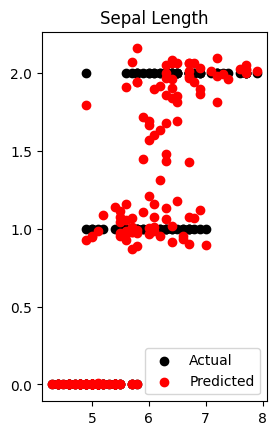

In [10]:
new_points = np.array([[5.0, 3.5, 1.0, 0.5], [5.5, 2.5, 4.0, 1.3], [6.0, 3.0, 5.0, 1.8]])
y_pred = localWeightRegression(X, y, 0.5)

for i in range(3):
    print('Predicted class for new point', i+1, 'is', iris.target_names[int(y_pred[i])], 'with actual class', iris.target_names[y[i]])
    
# Plotting the results
plt.figure()
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], y, color='black', label='Actual')
plt.scatter(X[:, 0], y_pred, color='red', label='Predicted')
plt.title('Sepal Length')
plt.legend()

Let's compare it with Logistic Regression and KNN:

Accuracy: 1.0


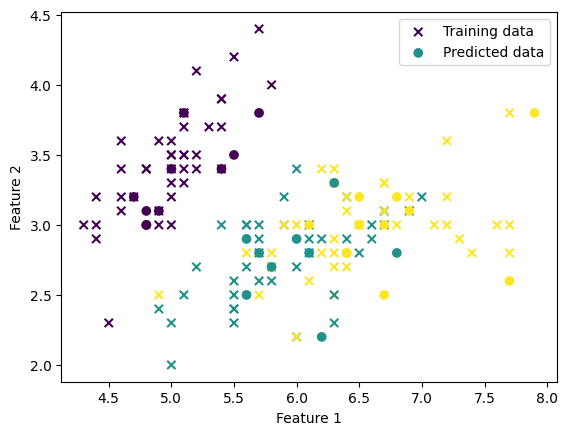

The point [5.  3.5 1.  0.5] is predicted as [0] belonging to class name setosa
The point [5.5 2.5 4.  1.3] is predicted as [1] belonging to class name versicolor
The point [6.  3.  5.  1.8] is predicted as [2] belonging to class name virginica


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))

# Plot the prediction
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', label='Training data', marker='x')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='viridis', label='Predicted data', marker='o')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

for i in range(len(new_points)):
    print('The point', new_points[i], 'is predicted as', knn.predict([new_points[i]]), 'belonging to class name', iris.target_names[knn.predict([new_points[i]])][0])

Accuracy: 1.0
The point [5.  3.5 1.  0.5] is predicted as 0 belong to class name setosa
The point [5.5 2.5 4.  1.3] is predicted as 1 belong to class name versicolor
The point [6.  3.  5.  1.8] is predicted as 2 belong to class name virginica


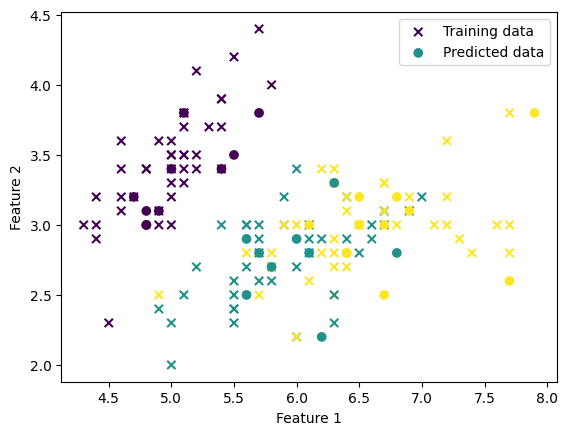

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))

# Plot the prediction
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', label='Training data', marker='x')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='viridis', label='Predicted data', marker='o')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

for i in range(len(new_points)):
    print('The point', new_points[i], 'is predicted as', logreg.predict([new_points[i]])[0], 'belong to class name', iris.target_names[logreg.predict([new_points[i]])[0]])